# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Loading Data

In [3]:
data_df=pd.read_csv('hotel_booking.csv')

#  Data cleaning and pre processing

In [4]:
data_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
data_df.shape

(119390, 36)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
data_df.nunique()

hotel                                  2
is_canceled                            2
lead_time                            479
arrival_date_year                      3
arrival_date_month                    12
arrival_date_week_number              53
arrival_date_day_of_month             31
stays_in_weekend_nights               17
stays_in_week_nights                  35
adults                                14
children                               5
babies                                 5
meal                                   5
country                              177
market_segment                         8
distribution_channel                   5
is_repeated_guest                      2
previous_cancellations                15
previous_bookings_not_canceled        73
reserved_room_type                    10
assigned_room_type                    12
booking_changes                       21
deposit_type                           3
agent                                333
company         

In [8]:
data_df=data_df.drop(['name','email','phone-number','credit_card'],axis=1)

In [9]:
data_df.shape

(119390, 32)

In [10]:
data_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
#converting reservation_status_date object to date time
data_df['reservation_status_date']=pd.to_datetime(data_df['reservation_status_date'])

# Checking for categorical values

In [12]:
data_df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


# Looking for unique column values of object type

In [13]:
for col in data_df.describe(include='object').columns:
    print(data_df[col].value_counts().to_frame(),'\n')

              hotel
City Hotel    79330
Resort Hotel  40060 

           arrival_date_month
August                  13877
July                    12661
May                     11791
October                 11160
April                   11089
June                    10939
September               10508
March                    9794
February                 8068
November                 6794
December                 6780
January                  5929 

            meal
BB         92310
HB         14463
SC         10650
Undefined   1169
FB           798 

     country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
..       ...
DJI        1
BWA        1
HND        1
VGB        1
NAM        1

[177 rows x 1 columns] 

               market_segment
Online TA               56477
Offline TA/TO           24219
Groups                  19811
Direct                  12606
Corporate                5295
Complementary             743
Aviation                  237
Undefined           

In [14]:
data_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
# as we can see company and agent column contain more null values that can't be handeled 
#so it would be better if we ignore agent and company column
data_df.drop(['company','agent'],axis=1,inplace=True)
#for country and children column we can delete the rows containing null values
data_df.dropna(inplace=True)

In [16]:
data_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [17]:
data_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [18]:
#here 5400 for adr(Average daily rate) is very high and also 5400 is not 75 or 50 or 25 % of all adr values it is very much large
#so we can filter only those values that are having adr less than 5400
data_df=data_df[data_df['adr']<5000]

# Data Analysis and Visualization

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


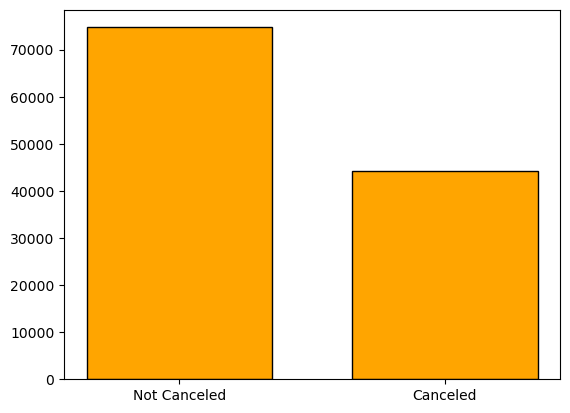

In [19]:
# As we are looking for why hotel bookings are being canceled 
# first we gonna check how many percentage of total booking have been canceled
can_booking_per=data_df['is_canceled'].value_counts(normalize=True)
print(can_booking_per)

plt.bar(['Not Canceled','Canceled'],data_df['is_canceled'].value_counts(),width = 0.7,edgecolor='black',color='orange')
plt.show()

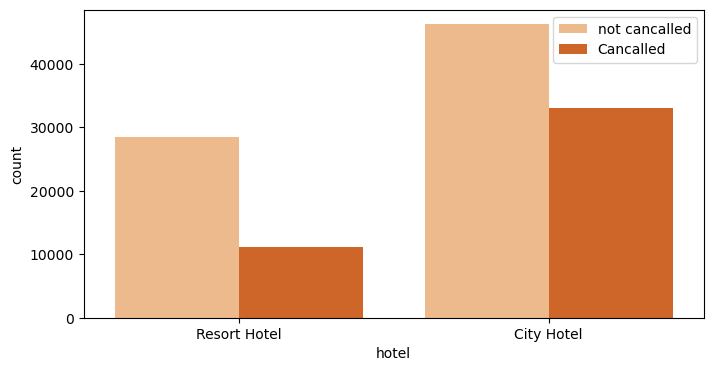

In [98]:
#So for available data 37% of booking are canceled which is very large for 1lakh + of records
#let see canceletion based on hotel type
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel',hue='is_canceled',data=data_df,palette='Oranges')
plt.legend(labels=['not cancalled','Cancalled'])
plt.show()

In [21]:
#lets check percantage wise how many bookings are canceled for resot hotels and city hotels
resort_hotel=data_df[data_df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [22]:
City_hotel=data_df[data_df['hotel']=='City Hotel']
City_hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [23]:
#From above bar graph and percantage calculations , City hotel facing more cancelation
#in city canceletion rate may be gretaer because of average daily rate
#lets find price of booking for city and resort hotel and compare them both
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=City_hotel.groupby('reservation_status_date')[['adr']].mean()

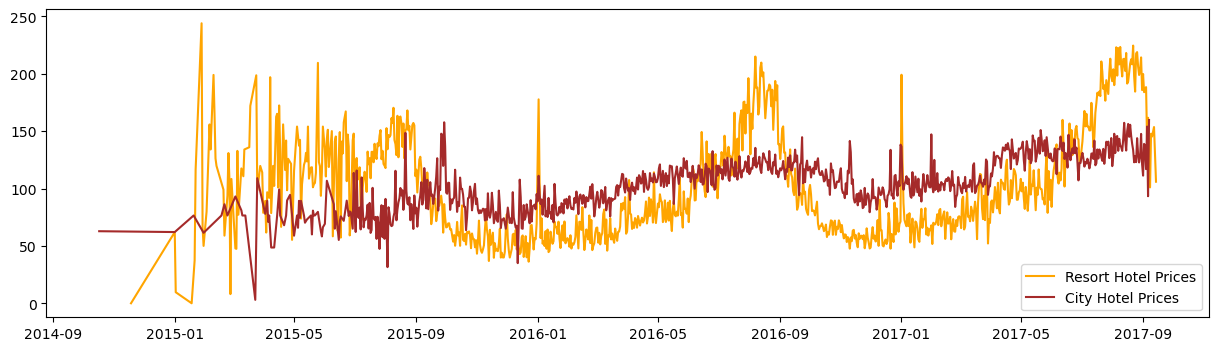

In [102]:
plt.figure(figsize=(15,4))
plt.plot(resort_hotel.index,resort_hotel['adr'],color='orange')
plt.plot(city_hotel.index,city_hotel['adr'],color='brown')
plt.legend(labels=['Resort Hotel Prices','City Hotel Prices'])
plt.show()

In [25]:
#as we can see hotel price in city is more than resort hotel price, so price may have great impact on canceletion in city hotels
#let's check canceletion rate month wise
data_df['month']=data_df.reservation_status_date.dt.month

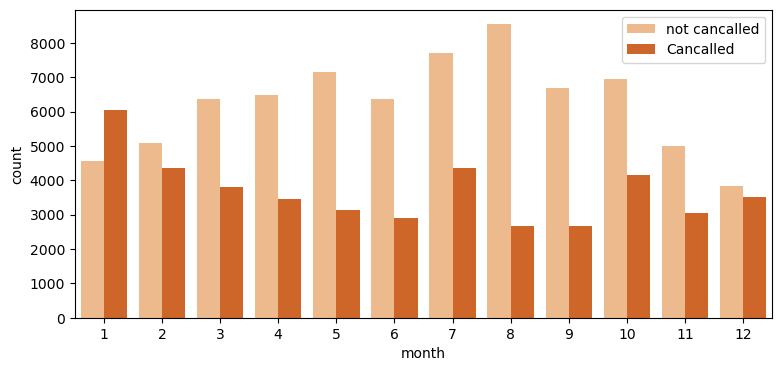

In [100]:
plt.figure(figsize=(9,4))
ax1=sns.countplot(x='month',hue='is_canceled',data=data_df,palette='Oranges')
plt.legend(labels=['not cancalled','Cancalled'])
plt.show()

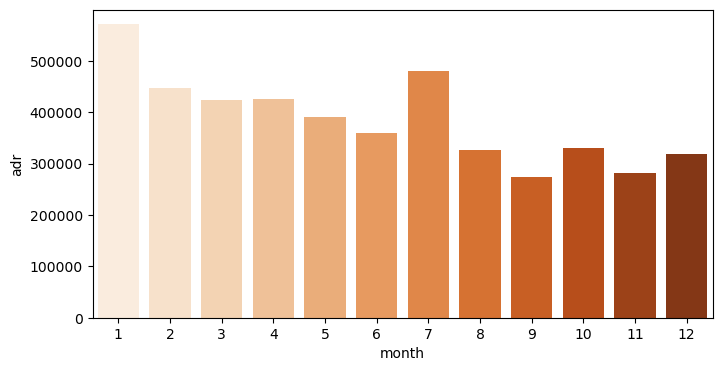

In [33]:
#from above it is clear that January and december has high number of canceletion , may be people book the hotel but 
#due to high prices they must canceled the booking because first and last month of year include lot of celebrations and fests
# let see price month wise on bookings
plt.figure(figsize=(8,4))
sns.barplot('month','adr',data=data_df[data_df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index(),palette='Oranges')
plt.show()

In [76]:
#lets check canceletion based on country
canceled_res=data_df[data_df['is_canceled']==1]
top_10_cntrs=canceled_res['country'].value_counts()[:10]
li=list(top_10_cntrs.keys())
li

['PRT', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU', 'IRL', 'BRA', 'USA', 'BEL']

In [80]:
y=[]
for i in li:
    y.append(len(canceled_res[canceled_res['country'] == i]))

In [81]:
y

[27514, 2453, 2177, 1934, 1333, 1218, 832, 830, 501, 474]

<AxesSubplot:>

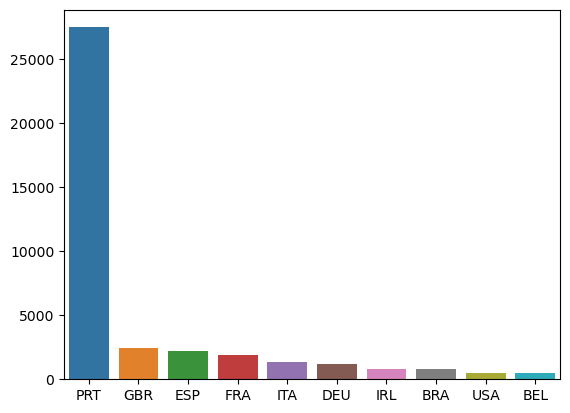

In [82]:
sns.barplot(x=li,y=y)

([<matplotlib.patches.Wedge at 0x251e3d6b5e0>,
 [Text(-0.6485414980270044, 0.888478432679651, 'PRT'),
  Text(-0.12452901505974424, -1.0929284168728757, 'GBR'),
  Text(0.2795827699816853, -1.0638766257087182, 'ESP'),
  Text(0.6082427774650023, -0.9165373553007318, 'FRA'),
  Text(0.8244337697170071, -0.7282231521657391, 'ITA'),
  Text(0.9549224064682716, -0.5460065911917595, 'DEU'),
  Text(1.0312598327523899, -0.38275730868464564, 'IRL'),
  Text(1.0729025706347506, -0.24265216653750293, 'BRA'),
  Text(1.0926161903610716, -0.12723938290033737, 'USA'),
  Text(1.0992090719340442, -0.041706308610296686, 'BEL')])

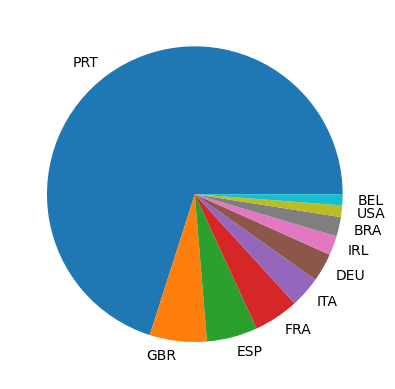

In [90]:
plt.pie(y,labels=li)

In [91]:
#so from above it is clear portugal has high rate of canceletion so we can suggest hotel to apply more facilities
#in portugle hotels change price ranges, needs a better advertisement and try to provide more services on reduced prices

In [92]:
#lets find canceletion based on different market segments
data_df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [94]:
canceled_res['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

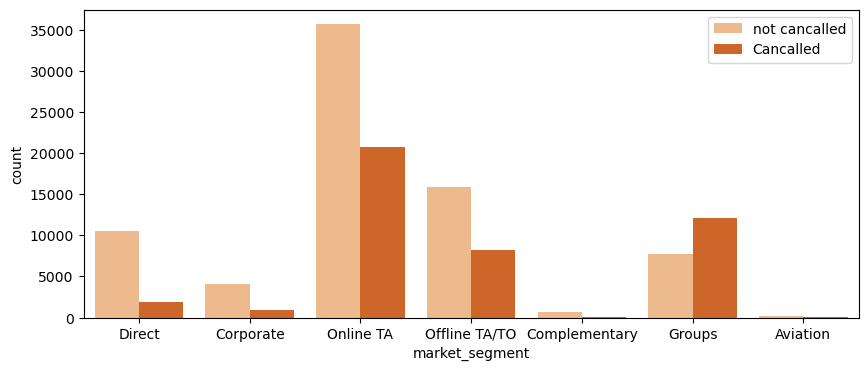

In [101]:
plt.figure(figsize=(10,4))
ax1=sns.countplot(x='market_segment',hue='is_canceled',data=data_df,palette='Oranges')
plt.legend(labels=['not cancalled','Cancalled'])

In [ ]:
#from above plot it is clear that most of custmers comes from online reservation and then from offline reservation. 
#But Online reservation has also has high canceletion. may be infrastructure and services are not same as mentioned 
#in online so this may cause of canceletion